Distance from the centre of the external magnet and the centre of the spinner = $65mm$
Green magnet and red magnet
We are tracking the angle of the spinner and comparing them with angles from the simulation
Output: table with center xy, red magnet xy, green magnet xy
calculate the xy with tangent

C0002 and C0004 have a spinner centre of ~ $x = (0 \pm 3)px, y = (0 \pm 3)px$

C0000 = oscillation as 50fps

C0002 = oscillation at 1000fps

C0004 = fast rotation at 1000fps

C0007 = slower rotation at 1000fps

2.1028868178870983 [ 0.10241312 -0.54206699  0.43965386 -0.43965386  0.83546969 -0.39581583
  0.24907794  0.14673789 -0.93806126]
1.4503371936979998 [-44.28781557 -43.48571233 -40.97224283 -42.26629281 -44.02360834
 -46.59334491 -45.39885446 -43.5908675  -42.16526009]
1.3452221419413335 [-7.62793629 -7.98779059 -8.07885892 -8.22642263 -9.23881921 -7.56344244
 -7.77317542 -9.47309955 -9.12546921]


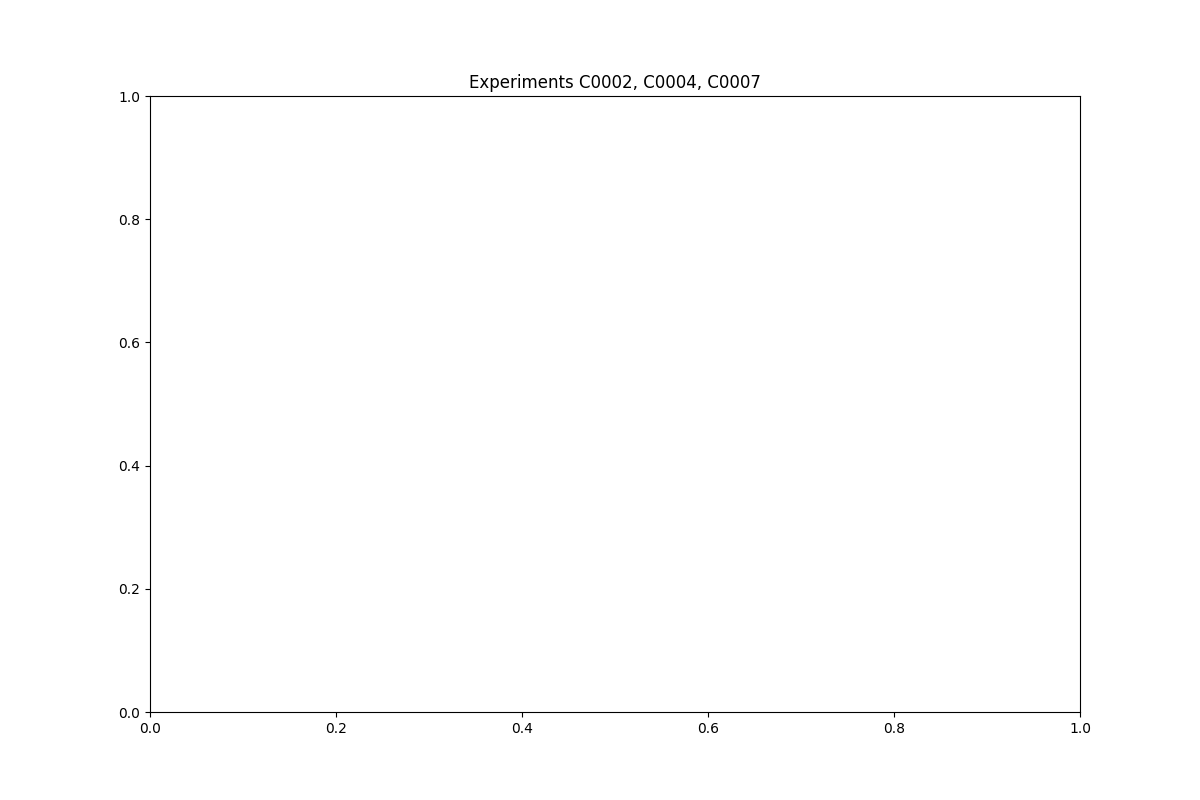

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import math
import scipy.optimize as opt

%matplotlib widget
plt.subplots(figsize=(12, 8))
plt.title("Experiments C0002, C0004, C0007")

input_paths = [
    # "C0000", # oscillation
    "C0002", # oscillation
    "C0004", # fast
    "C0007", # slow
]

lmap = lambda f,x : list(map(f, x))

processed_graphs = {}

for in_path in input_paths:
    with open(in_path + ".csv", "r+") as read:
            # DATA
            data = read.readlines()[1:]
            data = lmap(lambda row: row.rstrip().split(","), data)

            tdata = lmap(lambda row: float(row[0]), data)
            tdata = np.linspace(0, 2, len(tdata))
            xdata = lmap(lambda row: float(row[1]), data)
            ydata = lmap(lambda row: float(row[2]), data)

            ang_data = np.arctan2(ydata, xdata)

            # continualize
            for i in range(len(ang_data) - 1):
                if ang_data[i] - ang_data[i+1] > np.pi:
                    for j in range(i+1, len(ang_data)):
                        ang_data[j] += 2*np.pi
                elif ang_data[i] - ang_data[i+1] < -np.pi:
                    for j in range(i+1, len(ang_data)):
                        ang_data[j] -= 2*np.pi
                        
            # numerical differentiation
            d_ang_data = np.zeros(len(ang_data))
            dt = 1/1000
            for i in range(len(d_ang_data) - 1):
                d_ang_data[i+1] = (ang_data[i+1] - ang_data[i])/dt

            # smoothing
            sm_am = 15 # smoothing amount
            d_ang_data_smooth = np.convolve(d_ang_data, np.ones(sm_am)/sm_am,"same")
            
            # plt.plot()
            # plt.plot(tdata, ang_data)
            print(ang_data[0], d_ang_data[1:10])
            # plt.plot(tdata[sm_am:-2-sm_am], -d_ang_data_smooth[sm_am:-2-sm_am])

            processed_graphs[in_path] = {
                "tdata": tdata,
                "xdata": xdata,
                "ydata": ydata,
                "ang_data": ang_data,
                "d_ang_data": d_ang_data,

                "tdata_smooth": tdata[sm_am:-2-sm_am],
                "d_ang_data_smooth": -d_ang_data_smooth[sm_am:-2-sm_am]
            }

In [74]:
cols = {
    "C0000": "blue", # oscillation
    "C0002": "limegreen",  # oscillation
    "C0004": "lightsalmon",  # fast
    "C0007": "cornflowerblue",  # slow
}
cols2 = {
    "C0000": "red", # oscillation
    "C0002": "green",  # oscillation
    "C0004": "red",  # fast
    "C0007": "royalblue",  # slow
}
for in_path in input_paths:

    measured = processed_graphs[in_path]


    try:

        with open(f"sim/{in_path}_SIM.csv", "r+") as read:

            # DATA

            data = read.readlines()[1:]

            data = lmap(lambda row: row.rstrip().split(","), data)


            tdata = lmap(lambda row: float(row[0]), data)

            ydata = lmap(lambda row: float(row[1]), data)


            plt.plot(
                measured["tdata_smooth"],
                measured["d_ang_data_smooth"],
                c=f"{cols[in_path]}",
                linestyle="-",
                label=f"Measurement {in_path}",
            )


            plt.fill(
                list(measured["tdata_smooth"]) + list(measured["tdata_smooth"][::-1]),
                list(measured["d_ang_data_smooth"] * 0.9)
                + list(measured["d_ang_data_smooth"][::-1] * 1.1),
                c=f"{cols[in_path]}",
                alpha=0.33,
                label=f"Error interval {in_path}",
            )


            plt.plot(
                tdata,
                ydata,
                c=f"{cols2[in_path]}",
                linestyle="--",
                label=f"Simulation {in_path}",
            )

    except Exception as e:
        print(e)


plt.xlabel("$t$ $[s]$")
plt.ylabel("$ω$ $[rad/s]$")

plt.legend(bbox_to_anchor=(0.23, 0.565))

# Normal speed video

In [75]:
input_paths = [
    "C0000", # oscillation
    # "C0002", # oscillation
    # "C0004", # fast
    # "C0007", # slow
]

for in_path in input_paths:
    with open(in_path + ".csv", "r+") as read:
            # DATA
            data = read.readlines()[1:]
            data = lmap(lambda row: row.rstrip().split(","), data)

            tdata = lmap(lambda row: float(row[0]), data)
            # tdata = np.linspace(0, 2, len(tdata))
            xdata = lmap(lambda row: float(row[1]), data)
            ydata = lmap(lambda row: float(row[2]), data)

            ang_data = np.arctan2(ydata, xdata)

            # continualize
            for i in range(len(ang_data) - 1):
                if ang_data[i] - ang_data[i+1] > np.pi:
                    for j in range(i+1, len(ang_data)):
                        ang_data[j] += 2*np.pi
                elif ang_data[i] - ang_data[i+1] < -np.pi:
                    for j in range(i+1, len(ang_data)):
                        ang_data[j] -= 2*np.pi

            # numerical differentiation
            d_ang_data = np.zeros(len(ang_data))
            dt = 1/50
            for i in range(len(d_ang_data) - 1):
                d_ang_data[i+1] = (ang_data[i+1] - ang_data[i])/dt

            # smooothing
            sm_am = 1 # smoothing amount
            d_ang_data_smooth = np.convolve(d_ang_data, np.ones(sm_am)/sm_am,"same")
            
            # plt.plot()
            # plt.plot(tdata, ang_data)
            # print(ang_data[0], -d_ang_data_smooth[0:-2][sm_am:-sm_am][0])
            # plt.plot(tdata[sm_am:-2-sm_am], -d_ang_data_smooth[sm_am:-2-sm_am])

            processed_graphs[in_path] = {
                "tdata": tdata,
                "xdata": xdata,
                "ydata": ydata,
                "ang_data": ang_data,
                "d_ang_data": d_ang_data,

                "tdata_smooth": tdata[sm_am:-2-sm_am],
                "d_ang_data_smooth": -d_ang_data_smooth[sm_am:-2-sm_am]
            }

0.3448171228468498 0.0038094028069841 20.86746337499899


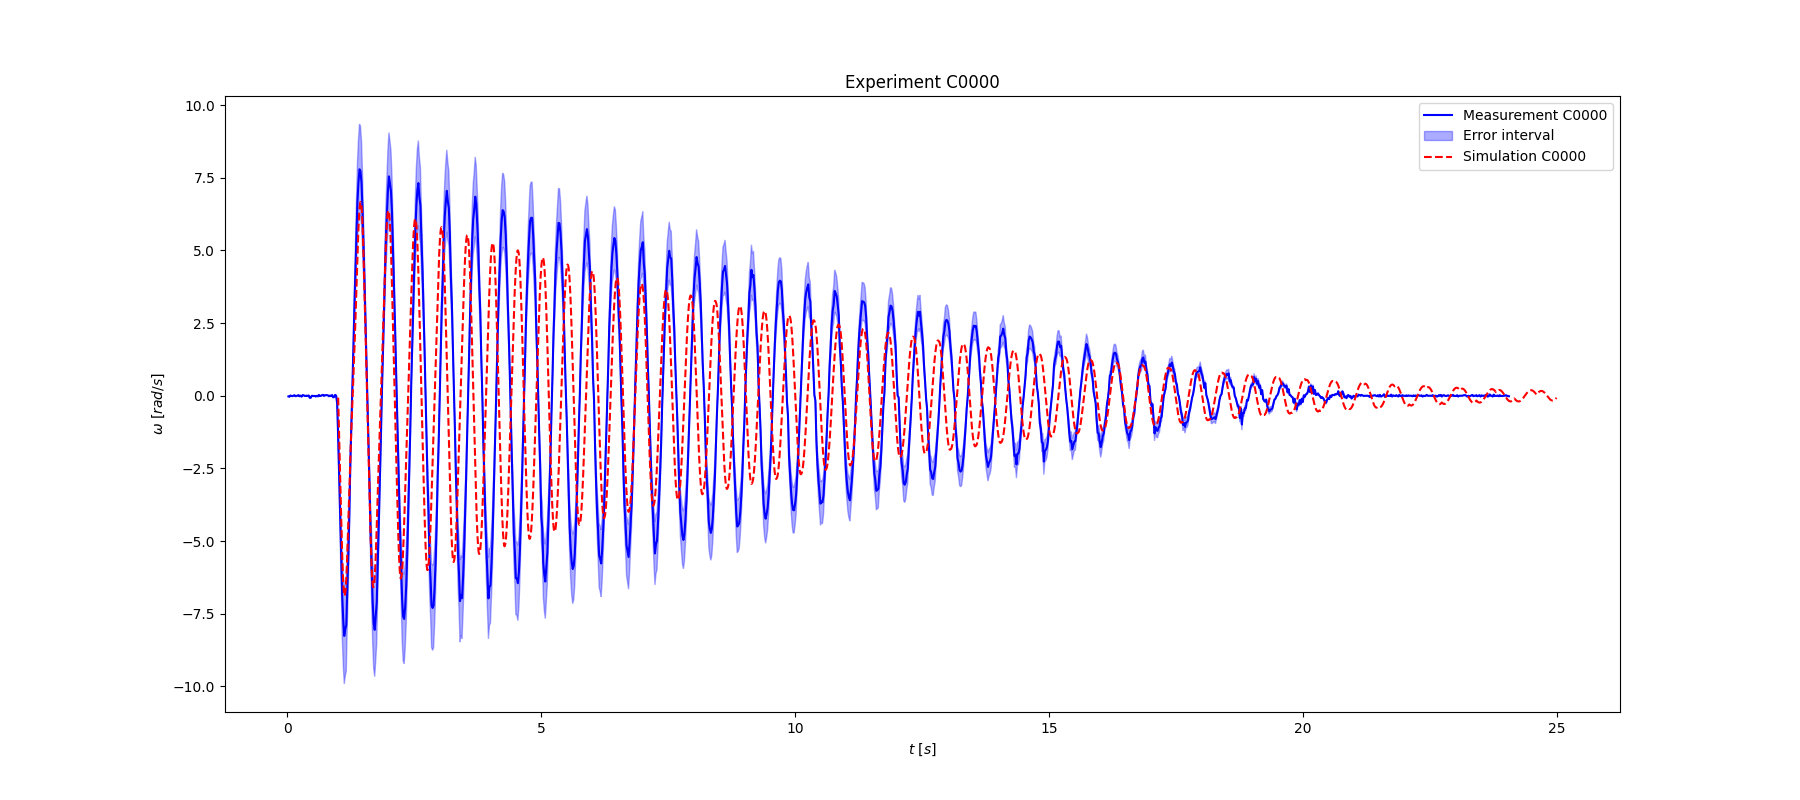

In [76]:
fig,ax = plt.subplots(figsize=(18,8))

for in_path in input_paths:
    measured = processed_graphs[in_path]

    with open(f"sim/{in_path}_SIM.csv", "r+") as read:
        # DATA
        data = read.readlines()[1:]
        data = lmap(lambda row: row.rstrip().split(","), data)

        tdata = lmap(lambda row: float(row[0]), data)
        ydata = lmap(lambda row: float(row[1]), data)

        # peak finding
        peaks, _ = sig.find_peaks(np.abs(measured["d_ang_data_smooth"]), height=0.1, distance=10)
        # print(peaks)
        peaks_x = lmap(lambda i: np.abs(measured["tdata_smooth"][i]), peaks)
        peaks_y = lmap(lambda i: np.abs(measured["d_ang_data_smooth"][i]), peaks)
        # plt.scatter(peaks_x, peaks_y)

        def ω(time, alpha, gamma, c_1):
            return [
                - math.sqrt(alpha / gamma)
                * math.tan(math.sqrt(alpha * gamma) * (t - c_1))
                for t in time
            ]
        
        # peak fitting
        [alpha, gamma, c], pcov = opt.curve_fit(
            ω,
            peaks_x, 
            peaks_y,
            bounds=(
                [0, 0, 0],  # min
                [1, 0.01, math.inf],  # max
            ),
            p0=[0.21, 0.00025, 170],
            max_nfev=10000
        )
        print(alpha, gamma, c)
        # plt.plot([0, *tdata], ω([0, *tdata], alpha, gamma, c), color="red", linestyle="--", label="Fit", zorder=10, alpha=0.75)

        plt.plot(measured["tdata_smooth"], measured["d_ang_data_smooth"], label = f"Measurement {in_path}", c=f"{cols[in_path]}")
        plt.fill(
            (measured["tdata_smooth"]) + (measured["tdata_smooth"][::-1]),
            list(measured["d_ang_data_smooth"] * 0.8) + list(measured["d_ang_data_smooth"][::-1] * 1.2),
            c = f"{cols[in_path]}",
            alpha = 0.33,
            label = "Error interval"
        )

        plt.plot(tdata, ydata, c = f"{cols2[in_path]}", linestyle="--", label = f"Simulation {in_path}")

plt.title("Experiment C0000")
plt.xlabel("$t$ $[s]$")
plt.ylabel("$ω$ $[rad/s]$")
plt.legend(loc="best")

## **NOTE! The large magnet is modeled as 5 magnetic dipoles at it's corners and the closest point to the spinner!**
### **NOTE! The large magnet is modeled poorly just using magnetic dipoles.**
### **NOTE! The large $\alpha$, $\beta$ and $\gamma$ coefficients are sometimes stupidly large or they are changing in time due to some reason (like the external magnetic field).**